In [1]:

# Calling Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
# For better readability of the data set, we display all the rows and columns of the dataset
pd.options.display.max_rows=None
pd.options.display.max_columns=None

## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [3]:

# Calling Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### 1.2 import and put the train and test datasets in  pandas dataframe

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train-2.csv')

### 1.3 display the first five rows of the train dataset.

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [7]:
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(1460, 81)
(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### 1.6 Save the 'Id' column

In [8]:
id_train = train['Id']
id_test = test['Id']

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [9]:
test.drop('Id',inplace=True,axis=1)
train.drop('Id',inplace=True,axis=1)

### 1.8 check again the data size after dropping the 'Id' variable

In [10]:
print(test.shape)
print(train.shape)

(1459, 79)
(1460, 80)


## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

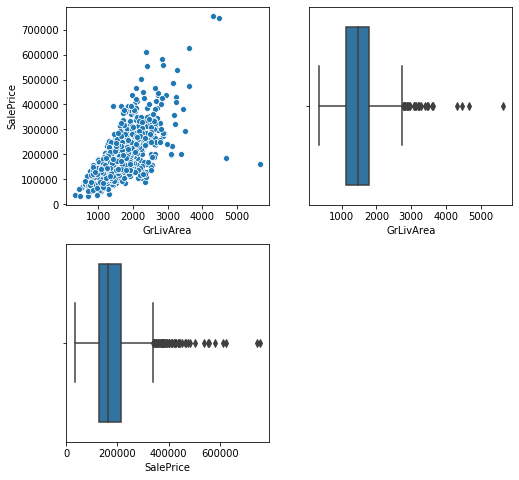

In [11]:
# create subplots 
plt.figure(figsize=(8,8))
#create scatter plots for train['GrLivArea'],  train['SalePrice']
plt.subplot(2,2,1)
sns.scatterplot(train['GrLivArea'],train['SalePrice'])
plt.subplot(2,2,2)
sns.boxplot(train['GrLivArea'])
plt.subplot(2,2,3)
sns.boxplot(train['SalePrice'])

#### observation:


### 1.9 b) Deleting outliers.And your observation?

419248.70453907084


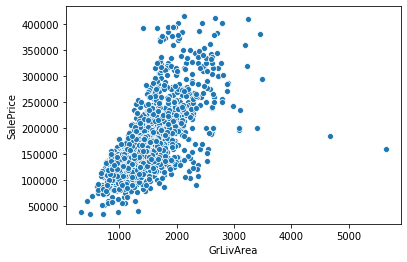

In [12]:
#Check the graphic again
print(train.SalePrice.mean()+ 3*train.SalePrice.std())
train_sale_outl = train[train.SalePrice < (train.SalePrice.mean()+ 3*train.SalePrice.std())]
#create scatterplot for train['GrLivArea'], train['SalePrice']
sns.scatterplot(train.GrLivArea,train_sale_outl.SalePrice,)

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

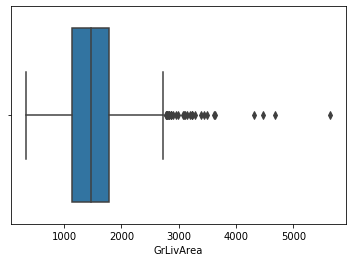

In [13]:
sns.boxplot(train['GrLivArea'])

train3 = train[train['GrLivArea']< (train['GrLivArea'].mean()+(3*train['GrLivArea'].std()))]


### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

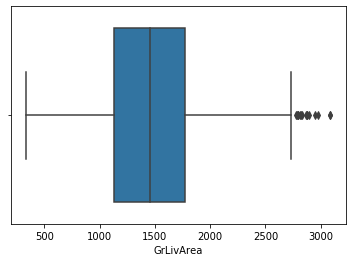

In [14]:
sns.boxplot(train3.GrLivArea)

## 1.10 Checking the skeweness for saleprice.And your observation?

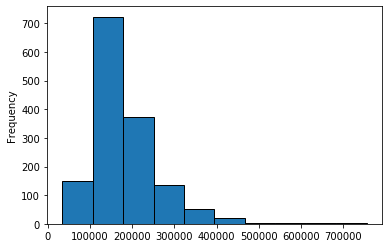

In [15]:
# create histogram for saleprice
train.SalePrice.plot(kind='hist', edgecolor = 'black')

# Get the fitted parameters used by the function

#Now plot the distribution

#Get also the QQ-plot


### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train.log_Price=np.log1p(train.SalePrice)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


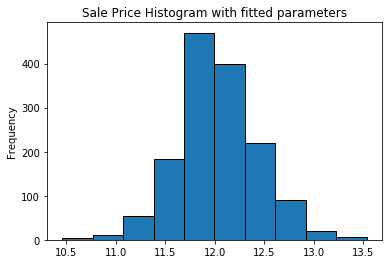

In [43]:
#Check the new distribution 

train.log_Price.plot(kind='hist',title='Sale Price Histogram with fitted parameters', edgecolor='black')

# Get the fitted parameters used by the function


#Now plot the distribution

#Get also the QQ-plot


#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [18]:
#all_data = pd.concat
all_data = pd.concat((train,test),sort=True)

In [19]:
# Drop the SalePrice
all_data.drop('SalePrice',axis=1,inplace=True)

### 1.12 Checking the all Missing Data?

In [20]:
all_data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenAbvGr        0
KitchenQual         1
LandContou

### 1.13 plot the missing values using barplot?

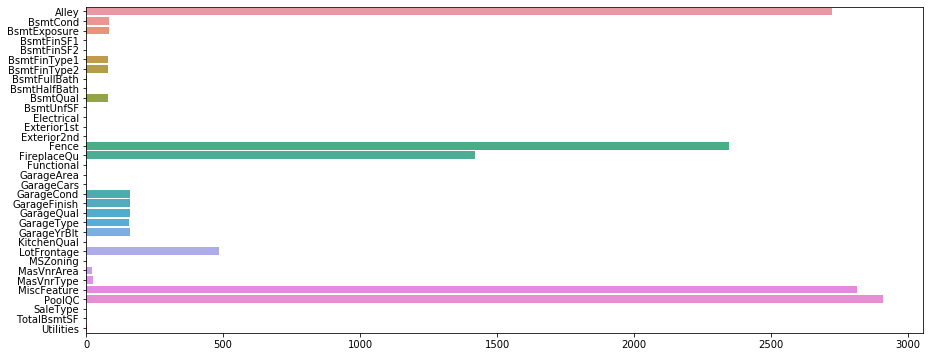

In [21]:
#create subplots
plt.figure(figsize=(15,6))
#create barplot for all missing values
cols_with_missing_values = all_data.columns[all_data.isnull().any()]
all_data[cols_with_missing_values].isnull().sum()
sns.barplot(all_data[cols_with_missing_values].isnull().sum(),cols_with_missing_values)



### 1.14 check the Data Correlation using heatmap.And your observation?

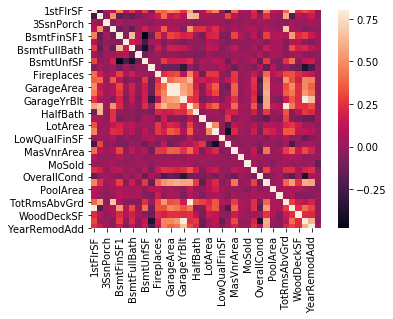

In [22]:
#Correlation map to see how features are correlated with SalePrice
sns.heatmap(all_data.corr(),vmax=.8, square=True)

#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#### MiscFeature : 
data description says NA means "no misc feature"

#### Alley : 
data description says NA means "no alley access"

Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [23]:
# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [24]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'].fillna(all_data['LotFrontage'].median(),inplace=True)

In [25]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
all_data['GarageType'].fillna('None',inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data['GarageQual'].fillna('None',inplace=True)
all_data['GarageCond'].fillna('None',inplace=True)

In [26]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data['GarageYrBlt'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)

In [27]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna(0,inplace=True)
all_data['BsmtHalfBath'].fillna(0,inplace=True)

In [28]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
all_data['BsmtQual'].fillna('No Basement',inplace=True)
all_data['BsmtCond'].fillna('No Basement',inplace=True)
all_data['BsmtExposure'].fillna('No Basement',inplace=True)
all_data['BsmtFinType1'].fillna('No Basement',inplace=True)
all_data['BsmtFinType2'].fillna('No Basement',inplace=True)

In [29]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MasVnrType'].fillna('None',inplace=True)

In [30]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'].fillna('RL',inplace=True)

In [31]:
#Functional : data description says NA means typical
all_data['Functional'].fillna('typical',inplace=True)

In [32]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'].fillna('SBrkr',inplace=True)

In [33]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'].fillna('TA',inplace=True)

In [34]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode(),inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode(),inplace=True)

In [35]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'].fillna(all_data['SaleType'].mode(),inplace=True)

In [36]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'].fillna('None',inplace=True)
all_data['Alley'].fillna('No Alley',inplace=True)
all_data['Fence'].fillna('No Fence',inplace=True)
all_data['MiscFeature'].fillna('None',inplace=True)
all_data['PoolQC'].fillna('No Pool',inplace=True)

### 1.17 Check again remaining missing values if any.And your observation?

In [44]:
all_data.isnull().sum()


1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      1
Exterior2nd      1
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass  

#### observation:
    

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [50]:
#MSSubClass=The building class

all_data.MSSubClass = all_data.MSSubClass.astype('category')
#Changing OverallCond into a categorical variable
all_data.OverallCond = all_data.OverallCond.astype('category')

#Year and month sold are transformed into categorical features.
all_data.YrSold = all_data.YearBuilt.astype('category')
all_data.MoSold = all_data.MoSold.astype('category')

#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [39]:

# process columns, apply LabelEncoder to categorical features

# shape        


### 1.19 Introduction to Test and Train


In [40]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

In [41]:
test1 = pd.read_csv('test.csv')
train1 = pd.read_csv('train-2.csv')
all_data1 = pd.concat((test1,train1),sort=True)
y = all_data1.SalePrice
X = all_data1.drop('SalePrice',axis=1)

### 1.21 Split the data into train and test set(70/30)?

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# The End